In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
%matplotlib inline 
from sklearn import datasets,linear_model

In [2]:
data = pd.read_csv('./Folds5x2_pp.csv')
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
data.shape

(9568, 5)

In [5]:
# 选取前四个特征作为样本特征
X = data[['AT','V','AP','RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [6]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [9]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7176, 4), (2392, 4), (7176, 1), (2392, 1))

In [10]:
# 运行线性模型
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [11]:
# 拟合结果的常数项和系数
linreg.intercept_,linreg.coef_

(array([447.06297099]),
 array([[-1.97376045, -0.23229086,  0.0693515 , -0.15806957]]))

In [13]:
# 模型评价
y_pred = linreg.predict(X_test)
from sklearn import metrics

# 计算MSE
print(metrics.mean_squared_error(y_test,y_pred))
# 计算RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

20.080401202073904
4.481116066570236


In [14]:
# 选择三个作为特征拟合模型，输出认为PE
X = data[['AT','V','AP']]
y = data[['PE']]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

linreg = LinearRegression()
linreg.fit(X_train,y_train)

y_pred = linreg.predict(X_test)
print(metrics.mean_squared_error(y_pred,y_test))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

23.208907470136225
4.817562399194869


In [16]:
# 采用10折交叉验证
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg,X,y,cv=10)

print(metrics.mean_squared_error(y,predicted))
print(np.sqrt(metrics.mean_squared_error(y,predicted)))

20.7955974619431
4.560219014690314


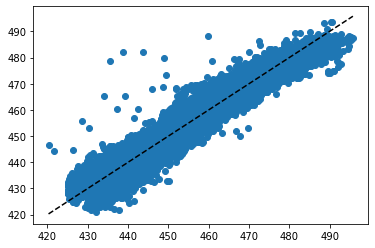

In [17]:
# 画图观察真实值和预测值的变化关系
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[y.min(),y.max()],'k--')
plt.show()